# Notebook to create the simulated conductance data 

In [1]:
import matplotlib.pyplot as plt
from S_matrix_functions import *

In [2]:
# define extra code/functions
def chem_potential_zero_energy(Gamma, U, Ez):
    """Returns the chemical potentials at which E_down = E_singlet. If there are no solutions, returns None.
    Args:
        `mu`: chemical potential 
        `Gamma`: superconducting pairing
        `U`: charging energy
        `Ez`: Zeeman energy
    """
    if (Ez + U / 2)*2 - Gamma*2 >= 0:
        return -U / 2 + np.sqrt((Ez + U / 2)*2 - Gamma*2), -U / 2 - np.sqrt( (Ez + U / 2)*2 - Gamma*2)
    else:
        return None


def get_Gammas(params, left=True ):
    """ Returns Gamma_even and Gamma_odd for randomly choosen parameters in 'params' using 'chem_potential_zero_energy'.
    Args:
        'params': list of all parameter for calculation GLL, GLR, GRL, GRR
        'left': True  --> chose parameter of left quantum dot
                False --> chose parameter of right quantum dot
    """
    if left==True:
        Gamma = params['Gamma_L']
        U = params['UL']
        Ez = params['EzL']
        muR, muL = chem_potential_zero_energy(Gamma, U, Ez)
        params['muR'] = muR
        params['muL'] = muL
        print(muR, muL)
    else:
        Gamma = params['Gamma_R']
        U = params['UR']
        Ez = params['EzR']
        muR, muL = chem_potential_zero_energy(Gamma, U, Ez)
        params['muR'] = muR
        params['muL'] = muL
        print(muR, muL)
    GLL, GLR, GRL, GRR, Gamma_even, Gamma_odd = get_G(0, **params)
    return Gamma_even, Gamma_odd


def get_Deltas(Delta0, tLI=.97, tRI=.97, **unused_kwargs):
    DeltaL = tLI**2 * Delta0
    DeltaR = tRI**2 * Delta0
    return DeltaL, DeltaR

In [6]:
n_data = 1 # defines number of systems to be generated (made for training data creating) 
n_dim = 56 # dimension of output

# save as arrays
GLL_all = np.zeros((n_data,n_dim,n_dim))
GLR_all = np.zeros((n_data,n_dim,n_dim))
GRL_all = np.zeros((n_data,n_dim,n_dim))
GRR_all = np.zeros((n_data,n_dim,n_dim))

t_D_vals = np.zeros((n_data,4))
Gammas = np.zeros((n_data,2))

for l in range(n_data):
    
    print(l+1,'/',n_data)

    # defne parameters for t's and Delta's:
    # these define Gamma_odd/even according to the derived Hamiltonian
    # --> you have to play around a bit with these values to get the specific Gamma_odd/even values
    val_t1 = np.random.uniform(0.01,0.48)
    val_t2 = np.random.uniform(0.01,0.48)
    val_D1 = np.random.uniform(0.01,0.48)
    val_D2 = np.random.uniform(0.01,0.48)
    
    # parameter choices
    params = dict(Delta0= np.random.uniform(0.2,0.6),
                  tLI= np.random.uniform(0.05,0.4),
                  tRI= np.random.uniform(0.05,0.4),
                  
                  t_uu=val_t1, t_dd=val_t1,
                  t_ud=val_t2, t_du=val_t2,
                  
                  Delta_uu=val_D1, Delta_dd=val_D1,
                  Delta_ud=val_D2, Delta_du=val_D2,
                  
                  UL=2, UR=2,   # shifts position of centers
                  EzL= np.random.uniform(-0.2, 0.2),
                  EzR= np.random.uniform(-0.2, 0.2), # shifts position of centers
                  muR=0, muL=0, 
                  T= np.random.uniform(0.02,0.03), # broadeing
                  Gamma_L= np.random.uniform(0.04,0.06),
                  Gamma_R= np.random.uniform(0.04,0.06) # "stretches" crossings in x/y direction
                 )
    
    
    # one crossing
    muL_range = np.linspace(0.1, 2.1, n_dim)
    muR_range = np.linspace(-0.1, -2.1, n_dim)
    
    GLLs = np.zeros((len(muL_range), len(muR_range)))
    GRLs = np.zeros((len(muL_range), len(muR_range)))
    GLRs = np.zeros((len(muL_range), len(muR_range)))
    GRRs = np.zeros((len(muL_range), len(muR_range)))
    params_c = params.copy()
    
    for i in range(len(muL_range)):
        muL = muL_range[i]
        params_c['muL']=muL
        for j in range(len(muR_range)):
            muR = muR_range[j]
            params_c['muR']=muR       
            GLL, GLR, GRL, GRR, Gamma_even, Gamma_odd = get_G(0, **params_c)

            GLLs[i, j] = GLL
            GLRs[i, j] = GLR
            GRLs[i, j] = GRL
            GRRs[i, j] = GRR
    
    GLL_all[l,:,:] = GLLs[:,:]
    GLR_all[l,:,:] = GLRs[:,:] 
    GRL_all[l,:,:] = GRLs[:,:] 
    GRR_all[l,:,:] = GRRs[:,:] 

    t_D_vals[l,0] = val_t1
    t_D_vals[l,1] = val_t2
    t_D_vals[l,2] = val_D1
    t_D_vals[l,3] = val_D2
    
    Gammas[l,0] = Gamma_odd
    Gammas[l,1] = Gamma_even
    
    print('Gamma_odd = ', Gamma_odd)
    print('Gamma_even = ', Gamma_even)
    print('Gamma_odd/Gamma_even = ', Gamma_odd/Gamma_even)


1 / 1
Gamma_odd =  0.15075978653975247
Gamma_even =  0.22270955367677234
Gamma_odd/Gamma_even =  0.6769345277327278


In [4]:
# # save differential conductance
# np.save('GLL_center_all.npy', GLL_all)
# np.save('GLR_center_all.npy', GLR_all)
# np.save('GRL_center_all.npy', GRL_all)
# np.save('GRR_center_all.npy', GRR_all)

# # save t and Delta effective 
# np.save('Gammas_center_all.npy', Gammas)


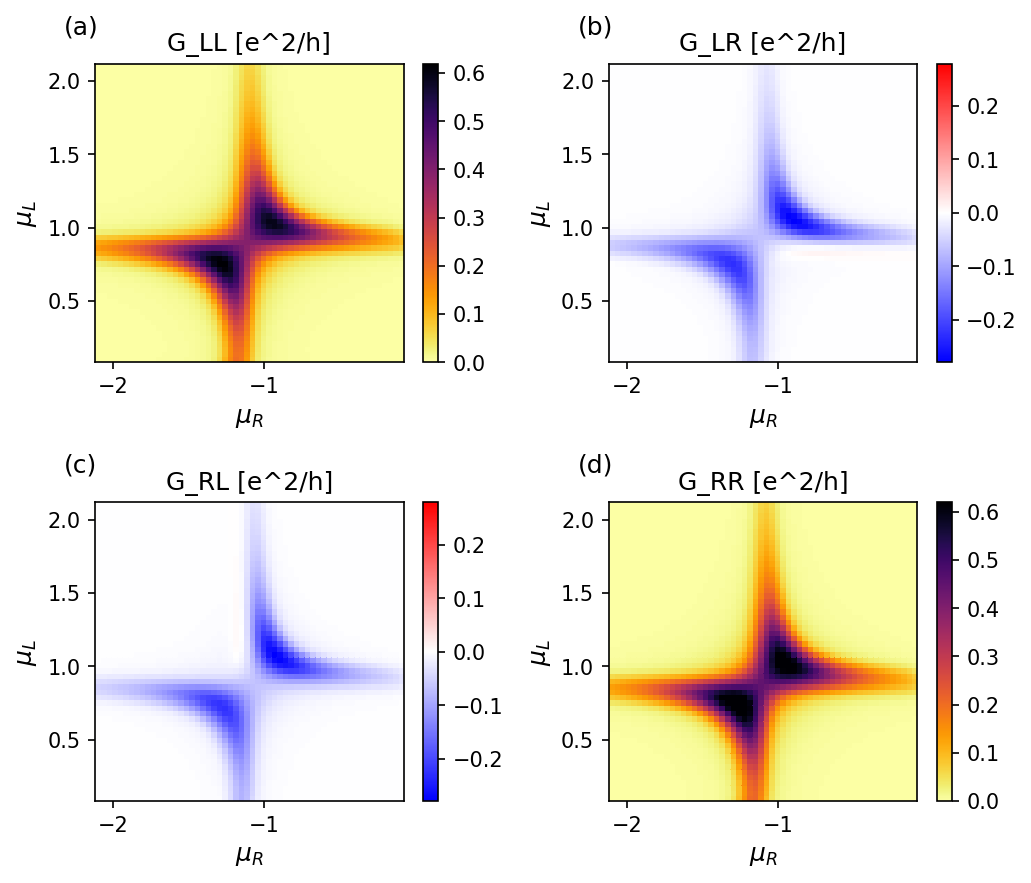

In [7]:
# plotting conductance
Glocal = np.max(GLLs)
Gnonlocal = np.max(abs(GLRs))
fig, axes = plt.subplots(2, 2, figsize=(7, 6), dpi=150)

ax = axes[0, 0]
im = ax.pcolor(muR_range, muL_range, GLLs, cmap='inferno_r', vmin=0, vmax=Glocal, shading='auto')
ax.set_xlabel(r'$\mu_R$', fontsize=12)
# ax.set_xticks([-1, 0, 1])
ax.set_ylabel(r'$\mu_L$', fontsize=12)
# ax.set_yticks([-1, 0, 1])
ax.set_title(r'G_LL [e^2/h]')
ax.text(-0.1, 1.1, '(a)', c='black', fontsize=12, transform=ax.transAxes)
plt.colorbar(im, ax=ax)

ax = axes[0, 1]
im = ax.pcolor(muR_range, muL_range, GLRs, cmap='bwr', vmin=-Gnonlocal, vmax=Gnonlocal, shading='auto')
ax.set_xlabel(r'$\mu_R$', fontsize=12)
# ax.set_xticks([-1, 0, 1])
ax.set_ylabel(r'$\mu_L$', fontsize=12)
# ax.set_yticks([-1, 0, 1])
ax.set_title(r'G_LR [e^2/h]')
ax.text(-0.1, 1.1, '(b)', c='black', fontsize=12, transform=ax.transAxes)
plt.colorbar(im, ax=ax)

ax = axes[1, 0]
im = ax.pcolor(muR_range, muL_range, GRLs, cmap='bwr', vmin=-Gnonlocal, vmax=Gnonlocal, shading='auto')
ax.set_xlabel(r'$\mu_R$', fontsize=12)
# ax.set_xticks([-1, 0, 1])
ax.set_ylabel(r'$\mu_L$', fontsize=12)
# ax.set_yticks([-1, 0, 1])
ax.set_title(r'G_RL [e^2/h]')
ax.text(-0.1, 1.1, '(c)', c='black', fontsize=12, transform=ax.transAxes)
plt.colorbar(im, ax=ax)

ax = axes[1, 1]
im = ax.pcolor(muR_range, muL_range, GRRs, cmap='inferno_r', vmin=0, vmax=Glocal, shading='auto')
ax.set_xlabel(r'$\mu_R$', fontsize=12)
# ax.set_xticks([-1, 0, 1])
ax.set_ylabel(r'$\mu_L$', fontsize=12)
# ax.set_yticks([-1, 0, 1])
ax.set_title(r'G_RR [e^2/h]')
ax.text(-0.1, 1.1, '(d)', c='black', fontsize=12, transform=ax.transAxes)
plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()